In [47]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [48]:
### Reading a netcdf file

ds = nc.Dataset('RRRAG4_Greenland_1993_2013_01_age_grid.nc')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Gridded age structure of the Greenland Ice Sheet
    original file name: Greenland_age_grid.nc
    version: 1.2
    citation: MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120
    date generated: 01-Apr-2015 08:59:30
    point of contact: Joseph MacGregor, joemac@ig.utexas.edu
    grid projection: EPSG:3413
    dimensions(sizes): number of grid points in y-direction(2675), number of grid points in x-direction(1479), number of isochrones(4), number of vertical layers(25)
    variables(dimensions): float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction), float64 depth_iso_uncert(number of isochrones, number of gri

In [49]:
print(ds.__dict__)

{'title': 'Gridded age structure of the Greenland Ice Sheet', 'original file name': 'Greenland_age_grid.nc', 'version': '1.2', 'citation': 'MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120', 'date generated': '01-Apr-2015 08:59:30', 'point of contact': 'Joseph MacGregor, joemac@ig.utexas.edu', 'grid projection': 'EPSG:3413'}


In [50]:
### Look at what dimensions are available

for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in y-direction', size = 2675
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in x-direction', size = 1479
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of isochrones', size = 4
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of vertical layers', size = 25


In [51]:
### Look at what variables are available

for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depths of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso_uncert(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depth uncertainty of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 age_norm(number of vertical layers, number of grid points in x-direction, number of grid points in y-direction)
    description: age at ice-thickness-normalized depths, evenly spaced vertically
    units: yr
unlimited dimensions: 
current shape = (25, 1479, 2675)
filling on, defaul

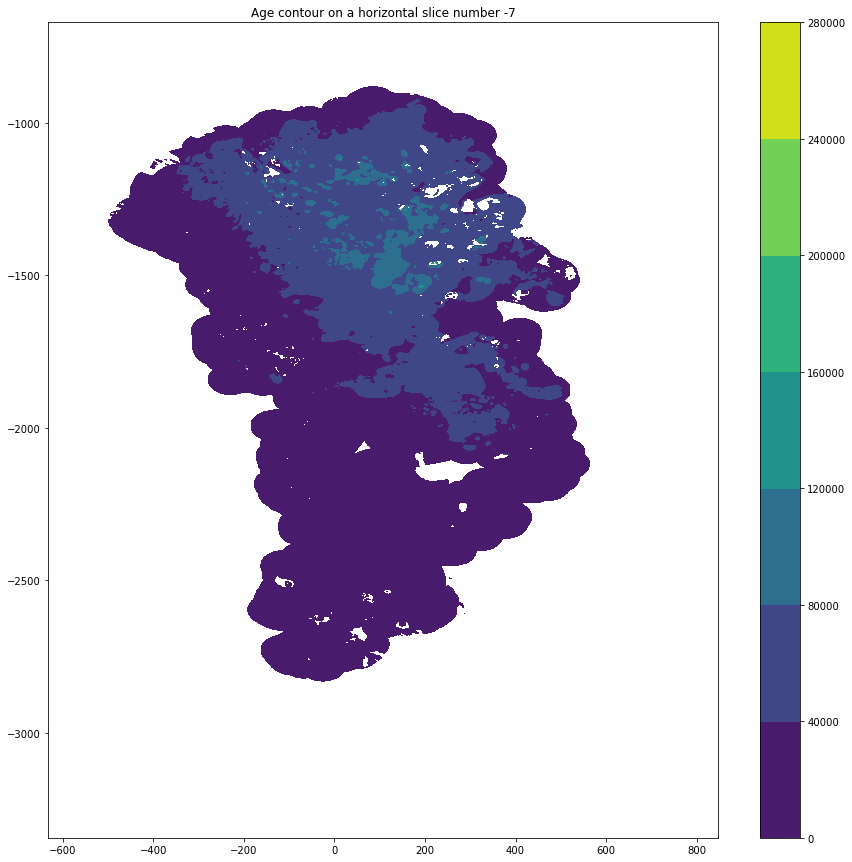

In [55]:
### Plot age
age_layer_number = -7
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
age = ds.variables['age_norm'][:][age_layer_number,:,:]

plt.rcParams['figure.figsize'] = [15, 15]
plt.contourf(x,y,age.T)
plt.colorbar()
plt.title("Age contour on a horizontal slice number " + str(age_layer_number))
plt.show()

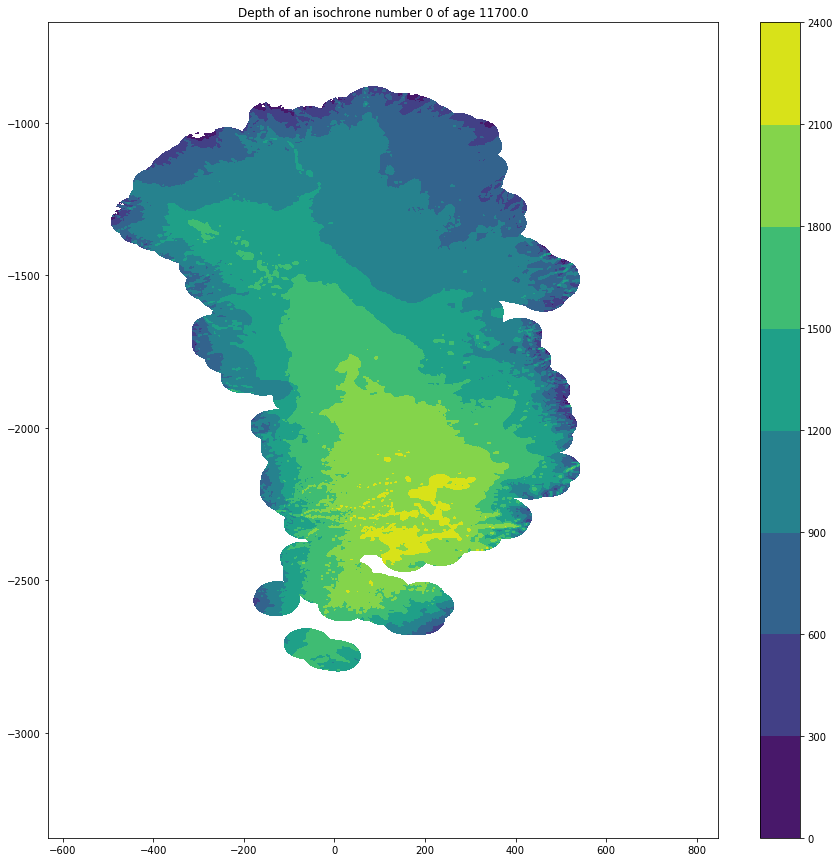

In [54]:
### Depth of an iscohrone provided in the data
isochrone_number = 0
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso = ds.variables['depth_iso'][:][isochrone_number,:,:]
age_iso = ds.variables['age_iso'][:][isochrone_number]

plt.contourf(x,y,depth_iso.T)
plt.colorbar()
plt.title("Depth of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

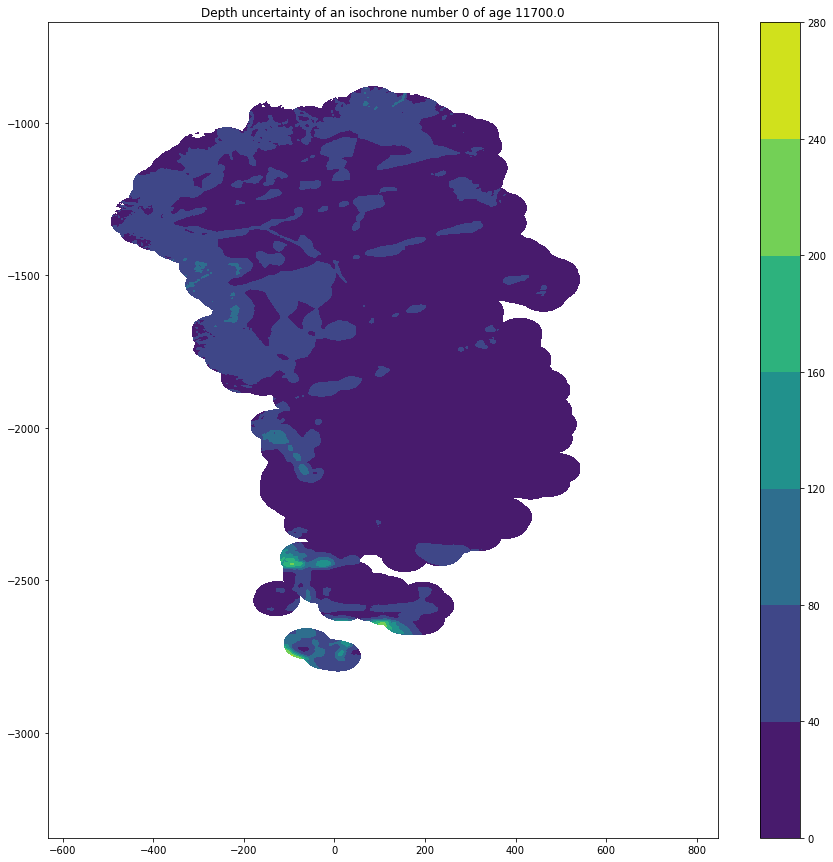

In [8]:
### Depth uncertainty of an iscohrone provided in the data
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso_uncert = ds.variables['depth_iso_uncert'][:][isochrone_number,:,:]

plt.contourf(x,y,depth_iso_uncert.T)
plt.colorbar()
plt.title("Depth uncertainty of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

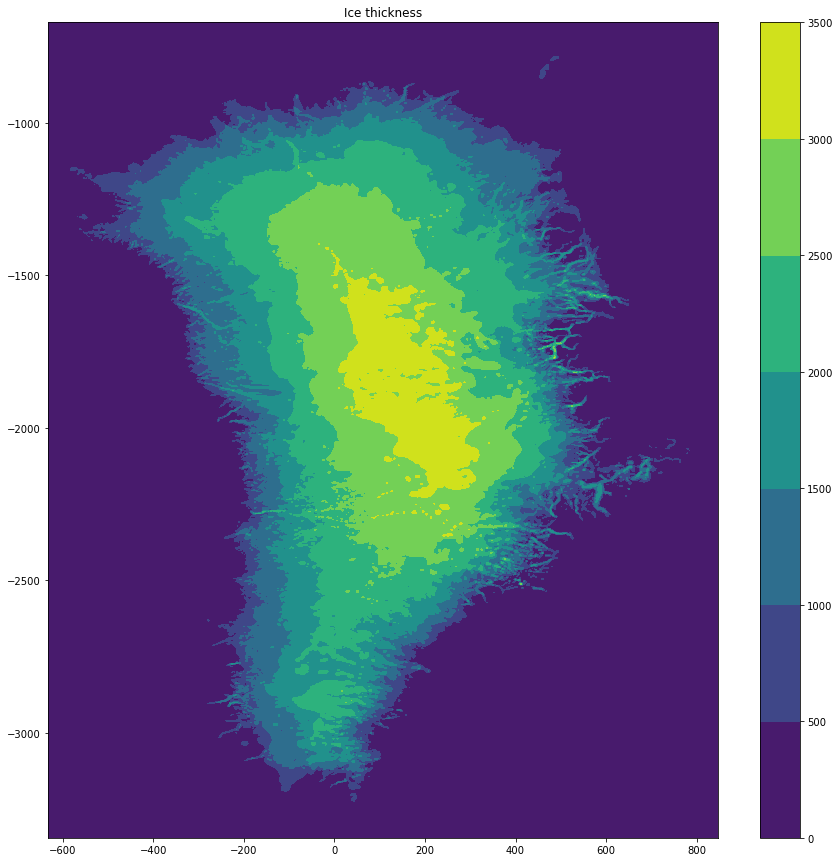

In [9]:
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
h = ds.variables['thick'][:][:,:]

plt.contourf(x,y,h.T)
plt.colorbar()
plt.title("Ice thickness")
plt.show()

In [10]:
### Reading a netcdf file

df = nc.Dataset('v5_grl20_ss25ka0003.nc')

zb = np.asarray(df.variables['zb'])

In [11]:
from scipy.spatial import distance

def closest_point(modelpoint, datapoints):
    closest_index = distance.cdist([modelpoint], datapoints).argmin()
    return datapoints[closest_index], closest_index

In [12]:
def get_nearest_index(component, grid_component):
    indices = []
    ii = np.argmin(np.abs(component - grid_component))

    if ii == 0 and component < grid_component[0]:

        indices.append(0)
    elif ii == len(grid_component) - 1 and component > grid_component[-1]:

        indices.append(len(grid_component) - 1)
    elif ii == len(grid_component) - 1:

        indices.append(ii - 1)
        indices.append(ii)
    else:

        indices.append(ii)
        indices.append(ii + 1)        
    
    return indices
    
def nearest_neighbor_interpolation_one_point(point, x_datagrid, y_datagrid, h_datagrid, field):
    
    x_indexes = get_nearest_index(point[2], x_datagrid)
    y_indexes = get_nearest_index(point[1], y_datagrid)
    
    list_of_points_to_check = []
    values = []

    for xi in x_indexes:
        for yi in y_indexes:
            
            for k in range(25):
                
                list_of_points_to_check.append(np.array([h_datagrid[xi, yi]*k/24, y_datagrid[yi], x_datagrid[xi]]))
                values.append(field[k, xi, yi])
    nearest_point, index = closest_point(point, list_of_points_to_check)
    
    return nearest_point, values[index], index

In [13]:
### Reading a netcdf file

df = nc.Dataset('v5_grl20_ss25ka0003.nc')

# for var in df.variables.values():
#     print(var)

In [14]:
x = ds.variables['x'][:][:,0]*1000
y = ds.variables['y'][:][0,:]*1000
h = ds.variables['thick'][:][:,:]
age = ds.variables['age_norm'][:][:,:,:]
nearest_neighbor_interpolation_one_point([1000,-2000000,1000], x, y, h, age)

(array([ 1.03854167e+03, -2.00000000e+06,  1.00000000e+03]),
 3762.2045788440078,
 10)

In [15]:
age[0,0,0]

nan

In [16]:
zb = np.asarray(df.variables['zb'])
H_t = np.asarray(df.variables['H_temp'])
H_c = np.asarray(df.variables['H_cold'])
zs = np.asarray(df.variables['zs'])
age_c = np.asarray(df.variables['age_c'])
age_t = np.asarray(df.variables['age_t'])
x_model = np.asarray(df.variables['x'])
y_model = np.asarray(df.variables['y'])

In [17]:
# age = np.zeros((age_c.shape[0]+age_t.shape[0]-1, len(y_model), len(x_model)))

# age[:age_t.shape[0],:,:] = age_t
# age[age_t.shape[0]-1:,:,:] = age_c

In [18]:
age_data_interp = np.zeros((age_c.shape[0]+age_t.shape[0]-1, len(y_model), len(x_model)))
z_model_grid = np.zeros((age_c.shape[0]+age_t.shape[0]-1, len(y_model), len(x_model)))

In [35]:
count = 0 
for i in range(age_data_interp.shape[0]):
    for j in range(len(y_model)):
        for k in range(len(x_model)):
            if (i < age_t.shape[0]):
                z = H_t[j,k]*i/(age_t.shape[0]-1)
            else:
                z = H_t[j,k] + H_c[j,k]* (i-age_t.shape[0]+1)/age_c.shape[0] 
                
            z_model_grid[i,j,k] = z
            count = count + 1
            if (count % 100000 == 0):
                print(count)
            _,age_data_interp[i,j,k],_ = nearest_neighbor_interpolation_one_point([z, y_model[j], x_model[k]], x, y, h, age[::-1])

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


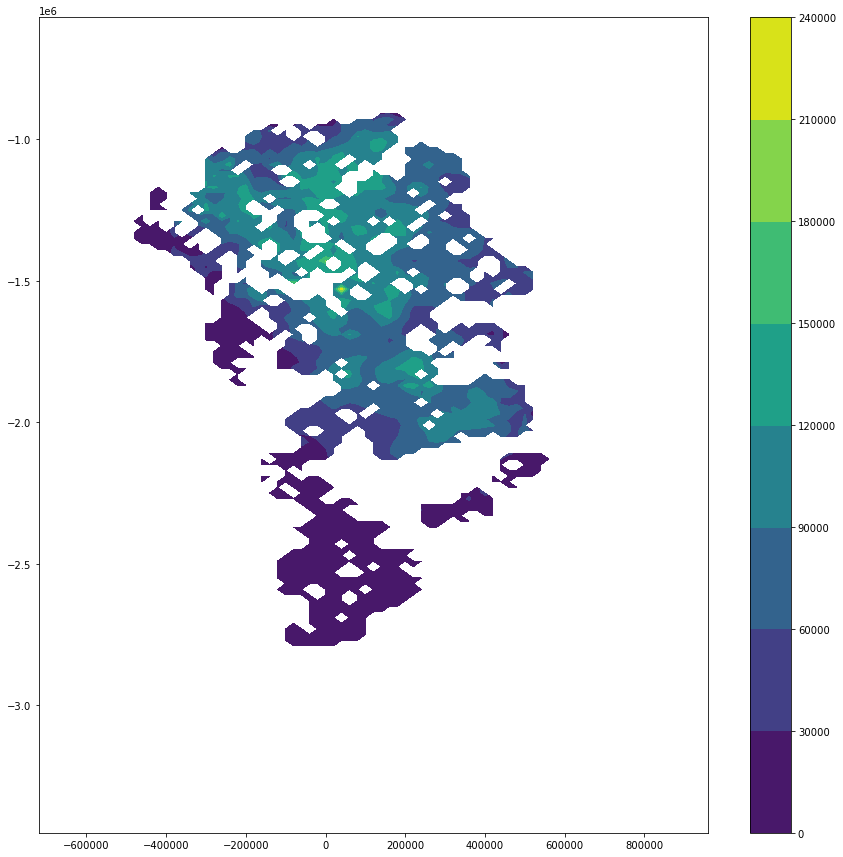

In [76]:
plt.contourf(x_model,y_model,age_data_interp[19,:,:])
plt.colorbar()
plt.show()

In [71]:
age_data_interp.shape

(91, 145, 85)

In [72]:
np.count_nonzero(np.isnan(age_data_interp))

896702